In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC 


In [48]:
train_df = pd.read_csv("https://raw.githubusercontent.com/Zyttik-m/Kaggle_Titanic_compet/refs/heads/main/data/train.csv")
test_df = pd.read_csv("https://raw.githubusercontent.com/Zyttik-m/Kaggle_Titanic_compet/refs/heads/main/data/test.csv")
gender_submission_df = pd.read_csv("https://raw.githubusercontent.com/Zyttik-m/Kaggle_Titanic_compet/refs/heads/main/data/gender_submission.csv")

In [49]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [50]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [51]:
gender_submission_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [52]:
train_pc1_df = train_df[train_df['Pclass']==1]['Survived']

In [53]:
train_pc2_df = train_df[train_df['Pclass']==2]['Survived']

In [54]:
train_pc3_df = train_df[train_df['Pclass']==3]['Survived']

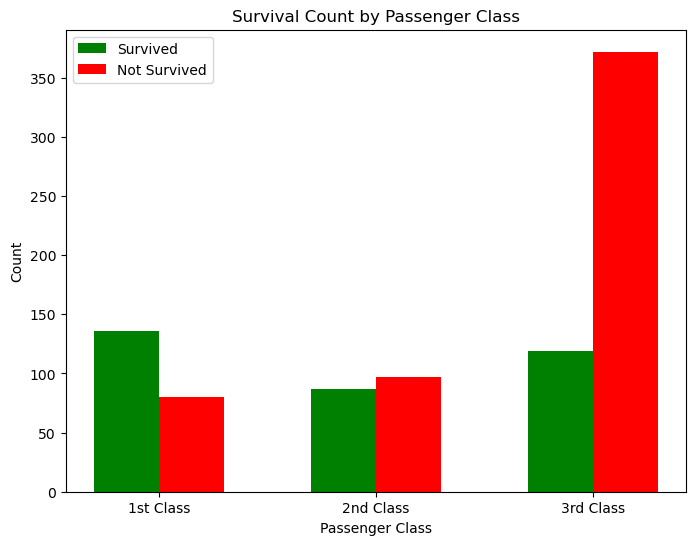

In [55]:
pclass_labels = ['1st Class', '2nd Class', '3rd Class']
survived_counts = [train_pc1_df.value_counts()[1], train_pc2_df.value_counts()[1], train_pc3_df.value_counts()[1]]
not_survived_counts = [train_pc1_df.value_counts()[0], train_pc2_df.value_counts()[0], train_pc3_df.value_counts()[0]]

bar_width = 0.3
x = np.arange(len(pclass_labels))

plt.figure(figsize=(8, 6))
plt.bar(x - bar_width/2, survived_counts, width=bar_width, label="Survived", color='green')
plt.bar(x + bar_width/2, not_survived_counts, width=bar_width, label="Not Survived", color='red')

plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.title("Survival Count by Passenger Class")
plt.xticks(x, pclass_labels)  
plt.legend() 

plt.show()


In [56]:
train_male_df = train_df[train_df['Sex']=='male']['Survived']

In [57]:
train_female_df = train_df[train_df['Sex']=='female']['Survived']

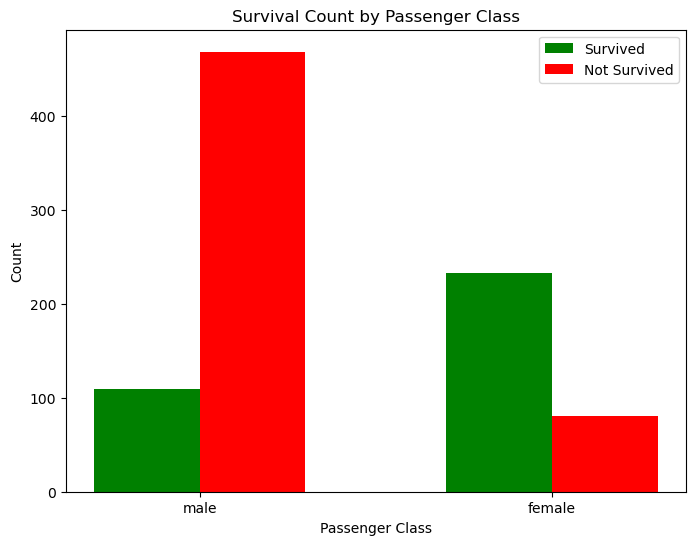

In [58]:
sex_labels = ['male', 'female']
survived_counts = [train_male_df.value_counts()[1], train_female_df.value_counts()[1]]
not_survived_counts = [train_male_df.value_counts()[0], train_female_df.value_counts()[0]]

bar_width = 0.3
x = np.arange(len(sex_labels))

plt.figure(figsize=(8, 6))
plt.bar(x - bar_width/2, survived_counts, width=bar_width, label="Survived", color='green')
plt.bar(x + bar_width/2, not_survived_counts, width=bar_width, label="Not Survived", color='red')

plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.title("Survival Count by Passenger Class")
plt.xticks(x, sex_labels)  
plt.legend() 

plt.show()


In [59]:
train_nosib_df = train_df[train_df['SibSp']==0]['Survived']

In [60]:
train_sib_df = train_df[train_df['SibSp']>0]['Survived']

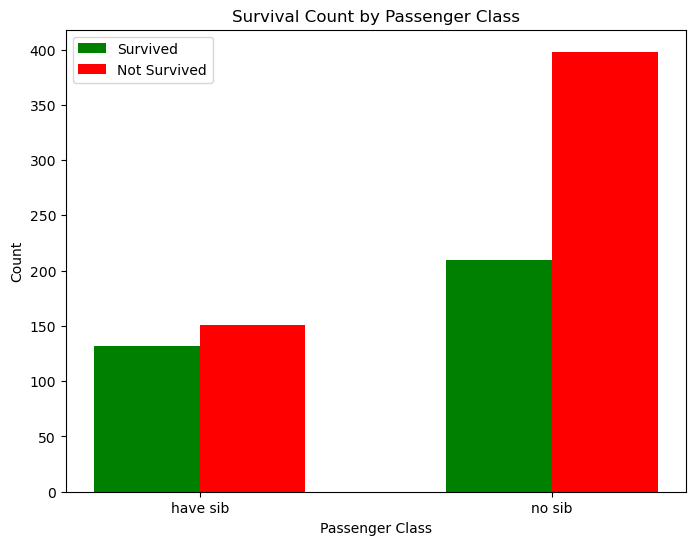

In [61]:
sib_labels = ['have sib', 'no sib']
survived_counts = [train_sib_df.value_counts()[1], train_nosib_df.value_counts()[1]]
not_survived_counts = [train_sib_df.value_counts()[0], train_nosib_df.value_counts()[0]]

bar_width = 0.3
x = np.arange(len(sib_labels))

plt.figure(figsize=(8, 6))
plt.bar(x - bar_width/2, survived_counts, width=bar_width, label="Survived", color='green')
plt.bar(x + bar_width/2, not_survived_counts, width=bar_width, label="Not Survived", color='red')

plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.title("Survival Count by Passenger Class")
plt.xticks(x, sib_labels)  
plt.legend() 

plt.show()


In [62]:
train_noparent_df = train_df[train_df['Parch']==0]['Survived']

In [63]:
train_parent_df = train_df[train_df['Parch']>0]['Survived']

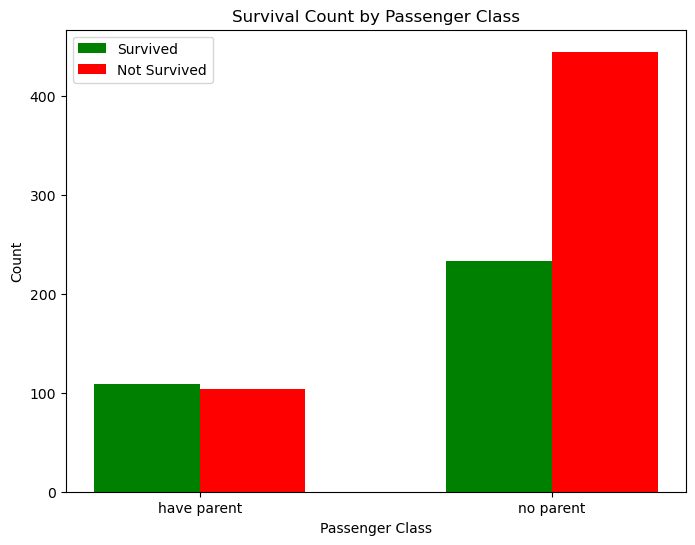

In [64]:
parent_labels = ['have parent', 'no parent']
survived_counts = [train_parent_df.value_counts()[1], train_noparent_df.value_counts()[1]]
not_survived_counts = [train_parent_df.value_counts()[0], train_noparent_df.value_counts()[0]]

bar_width = 0.3
x = np.arange(len(parent_labels))

plt.figure(figsize=(8, 6))
plt.bar(x - bar_width/2, survived_counts, width=bar_width, label="Survived", color='green')
plt.bar(x + bar_width/2, not_survived_counts, width=bar_width, label="Not Survived", color='red')

plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.title("Survival Count by Passenger Class")
plt.xticks(x, parent_labels)  
plt.legend() 

plt.show()


In [65]:
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [66]:
train_df['Pclass_Fare'] = train_df['Pclass'] * train_df['Fare']

In [67]:
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train_df['Title'] = train_df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train_df['Title'] = train_df['Title'].replace(['Mlle', 'Ms'], 'Miss')
train_df['Title'] = train_df['Title'].replace(['Mme'], 'Mrs')


<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
/var/folders/5w/bc6sh_zn18q5gdgdp60d2hnr0000gn/T/ipykernel_72729/4089494839.py:1: SyntaxWarning: invalid escape sequence '\.'
  train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [79]:
print(train_df['Sex'].unique())

['male' 'female']


In [80]:
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})


In [76]:
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=[0, 12, 18, 35, 50, 80], labels=[0, 1, 2, 3, 4])


/var/folders/5w/bc6sh_zn18q5gdgdp60d2hnr0000gn/T/ipykernel_72729/2653097545.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)


In [75]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
train_df['IsAlone'] = (train_df['FamilySize'] == 1).astype(int)


In [98]:
train_df['Cabin'] = train_df['Cabin'].fillna('Unknown')
train_df['CabinLetter'] = train_df['Cabin'].apply(lambda x: x[0])


In [85]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)


/var/folders/5w/bc6sh_zn18q5gdgdp60d2hnr0000gn/T/ipykernel_72729/3873893662.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)


### Preprocess ###

In [88]:
train_df = pd.get_dummies(train_df, columns=['Title', 'CabinLetter', 'Embarked'], drop_first=True)


In [89]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,CabinLetter_B,CabinLetter_C,CabinLetter_D,CabinLetter_E,CabinLetter_F,CabinLetter_G,CabinLetter_T,CabinLetter_U,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,False,False,False,False,False,False,False,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,False,True,False,False,False,False,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,False,False,False,False,False,False,False,True,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,...,False,True,False,False,False,False,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,...,False,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,...,False,False,False,False,False,False,False,True,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,...,True,False,False,False,False,False,False,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,...,False,False,False,False,False,False,False,True,False,True
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,...,False,True,False,False,False,False,False,False,False,False


In [77]:
print(train_df['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Rare']


In [90]:
train_df_use=train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Fare','Pclass'], axis=1)

In [91]:
train_df_use

,Survived,Sex,Age,Pclass_Fare,AgeGroup,FamilySize,IsAlone,Title_Miss,Title_Mr,Title_Mrs,...,CabinLetter_B,CabinLetter_C,CabinLetter_D,CabinLetter_E,CabinLetter_F,CabinLetter_G,CabinLetter_T,CabinLetter_U,Embarked_Q,Embarked_S
0,0,0,22.0,21.7500,2,2,0,False,True,False,...,False,False,False,False,False,False,False,True,False,True
1,1,1,38.0,71.2833,3,2,0,False,False,True,...,False,True,False,False,False,False,False,False,False,False
2,1,1,26.0,23.7750,2,1,1,True,False,False,...,False,False,False,False,False,False,False,True,False,True
3,1,1,35.0,53.1000,2,2,0,False,False,True,...,False,True,False,False,False,False,False,False,False,True
4,0,0,35.0,24.1500,2,1,1,False,True,False,...,False,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,27.0,26.0000,2,1,1,False,False,False,...,False,False,False,False,False,False,False,True,False,True
887,1,1,19.0,30.0000,2,1,1,True,False,False,...,True,False,False,False,False,False,False,False,False,True
888,0,1,28.0,70.3500,2,4,0,True,False,False,...,False,False,False,False,False,False,False,True,False,True
889,1,0,26.0,30.0000,2,1,1,False,True,False,...,False,True,False,False,False,False,False,False,False,False


In [125]:
test_df['Pclass_Fare'] = test_df['Pclass'] * test_df['Fare']
test_df['Pclass_Fare'].fillna(test_df['Pclass_Fare'].median(), inplace=True)

/var/folders/5w/bc6sh_zn18q5gdgdp60d2hnr0000gn/T/ipykernel_72729/1513274316.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Pclass_Fare'].fillna(test_df['Pclass_Fare'].median(), inplace=True)


In [93]:
test_df['Title'] = test_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test_df['Title'] = test_df['Title'].replace(['Mlle', 'Ms'], 'Miss')
test_df['Title'] = test_df['Title'].replace(['Mme'], 'Mrs')


<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
/var/folders/5w/bc6sh_zn18q5gdgdp60d2hnr0000gn/T/ipykernel_72729/1087597152.py:1: SyntaxWarning: invalid escape sequence '\.'
  test_df['Title'] = test_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [94]:
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})

In [95]:
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['AgeGroup'] = pd.cut(test_df['Age'], bins=[0, 12, 18, 35, 50, 80], labels=[0, 1, 2, 3, 4])


/var/folders/5w/bc6sh_zn18q5gdgdp60d2hnr0000gn/T/ipykernel_72729/2206832676.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Age'].fillna(test_df['Age'].median(), inplace=True)


In [96]:
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1
test_df['IsAlone'] = (test_df['FamilySize'] == 1).astype(int)


In [99]:
test_df['Cabin'] = test_df['Cabin'].fillna('Unknown')
test_df['CabinLetter'] = test_df['Cabin'].apply(lambda x: x[0])


In [100]:
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)


/var/folders/5w/bc6sh_zn18q5gdgdp60d2hnr0000gn/T/ipykernel_72729/2006328385.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)


In [101]:
test_df = pd.get_dummies(test_df, columns=['Title', 'CabinLetter', 'Embarked'], drop_first=True)


In [130]:
test_df_use=test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Fare','Pclass'], axis=1)

In [132]:
test_df_use

,Sex,Age,Pclass_Fare,AgeGroup,FamilySize,IsAlone,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,CabinLetter_B,CabinLetter_C,CabinLetter_D,CabinLetter_E,CabinLetter_F,CabinLetter_G,CabinLetter_U,Embarked_Q,Embarked_S
0,0,34.5,23.4876,2,1,1,False,True,False,False,False,False,False,False,False,False,True,True,False
1,1,47.0,21.0000,3,2,0,False,False,True,False,False,False,False,False,False,False,True,False,True
2,0,62.0,19.3750,4,1,1,False,True,False,False,False,False,False,False,False,False,True,True,False
3,0,27.0,25.9875,2,1,1,False,True,False,False,False,False,False,False,False,False,True,False,True
4,1,22.0,36.8625,2,3,0,False,False,True,False,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,27.0,24.1500,2,1,1,False,True,False,False,False,False,False,False,False,False,True,False,True
414,1,39.0,108.9000,3,1,1,False,False,False,True,False,True,False,False,False,False,False,False,False
415,0,38.5,21.7500,3,1,1,False,True,False,False,False,False,False,False,False,False,True,False,True
416,0,27.0,24.1500,2,1,1,False,True,False,False,False,False,False,False,False,False,True,False,True


In [104]:
train_df_use

,Survived,Sex,Age,Pclass_Fare,AgeGroup,FamilySize,IsAlone,Title_Miss,Title_Mr,Title_Mrs,...,CabinLetter_B,CabinLetter_C,CabinLetter_D,CabinLetter_E,CabinLetter_F,CabinLetter_G,CabinLetter_T,CabinLetter_U,Embarked_Q,Embarked_S
0,0,0,22.0,21.7500,2,2,0,False,True,False,...,False,False,False,False,False,False,False,True,False,True
1,1,1,38.0,71.2833,3,2,0,False,False,True,...,False,True,False,False,False,False,False,False,False,False
2,1,1,26.0,23.7750,2,1,1,True,False,False,...,False,False,False,False,False,False,False,True,False,True
3,1,1,35.0,53.1000,2,2,0,False,False,True,...,False,True,False,False,False,False,False,False,False,True
4,0,0,35.0,24.1500,2,1,1,False,True,False,...,False,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,27.0,26.0000,2,1,1,False,False,False,...,False,False,False,False,False,False,False,True,False,True
887,1,1,19.0,30.0000,2,1,1,True,False,False,...,True,False,False,False,False,False,False,False,False,True
888,0,1,28.0,70.3500,2,4,0,True,False,False,...,False,False,False,False,False,False,False,True,False,True
889,1,0,26.0,30.0000,2,1,1,False,True,False,...,False,True,False,False,False,False,False,False,False,False


In [133]:
train_columns = train_df_use.columns
for col in train_columns:
    if col not in test_df_use.columns:
        test_df_use[col] = 0
test_df_use = test_df_use[train_columns]
test_df_use['CabinLetter_T']=False



In [134]:
test_df_use

,Survived,Sex,Age,Pclass_Fare,AgeGroup,FamilySize,IsAlone,Title_Miss,Title_Mr,Title_Mrs,...,CabinLetter_B,CabinLetter_C,CabinLetter_D,CabinLetter_E,CabinLetter_F,CabinLetter_G,CabinLetter_T,CabinLetter_U,Embarked_Q,Embarked_S
0,0,0,34.5,23.4876,2,1,1,False,True,False,...,False,False,False,False,False,False,False,True,True,False
1,0,1,47.0,21.0000,3,2,0,False,False,True,...,False,False,False,False,False,False,False,True,False,True
2,0,0,62.0,19.3750,4,1,1,False,True,False,...,False,False,False,False,False,False,False,True,True,False
3,0,0,27.0,25.9875,2,1,1,False,True,False,...,False,False,False,False,False,False,False,True,False,True
4,0,1,22.0,36.8625,2,3,0,False,False,True,...,False,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,0,27.0,24.1500,2,1,1,False,True,False,...,False,False,False,False,False,False,False,True,False,True
414,0,1,39.0,108.9000,3,1,1,False,False,False,...,False,True,False,False,False,False,False,False,False,False
415,0,0,38.5,21.7500,3,1,1,False,True,False,...,False,False,False,False,False,False,False,True,False,True
416,0,0,27.0,24.1500,2,1,1,False,True,False,...,False,False,False,False,False,False,False,True,False,True


In [ ]:
print(test_df_use.isnull().sum())

In [136]:
x_train = train_df_use.drop('Survived', axis=1)
y_train = train_df_use['Survived']
x_test = test_df_use.drop('Survived', axis=1)
y_test = gender_submission_df['Survived']

In [139]:
x_train

,Sex,Age,Pclass_Fare,AgeGroup,FamilySize,IsAlone,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,CabinLetter_B,CabinLetter_C,CabinLetter_D,CabinLetter_E,CabinLetter_F,CabinLetter_G,CabinLetter_T,CabinLetter_U,Embarked_Q,Embarked_S
0,0,22.0,21.7500,2,2,0,False,True,False,False,False,False,False,False,False,False,False,True,False,True
1,1,38.0,71.2833,3,2,0,False,False,True,False,False,True,False,False,False,False,False,False,False,False
2,1,26.0,23.7750,2,1,1,True,False,False,False,False,False,False,False,False,False,False,True,False,True
3,1,35.0,53.1000,2,2,0,False,False,True,False,False,True,False,False,False,False,False,False,False,True
4,0,35.0,24.1500,2,1,1,False,True,False,False,False,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,26.0000,2,1,1,False,False,False,True,False,False,False,False,False,False,False,True,False,True
887,1,19.0,30.0000,2,1,1,True,False,False,False,True,False,False,False,False,False,False,False,False,True
888,1,28.0,70.3500,2,4,0,True,False,False,False,False,False,False,False,False,False,False,True,False,True
889,0,26.0,30.0000,2,1,1,False,True,False,False,False,True,False,False,False,False,False,False,False,False


In [140]:
x_test

,Sex,Age,Pclass_Fare,AgeGroup,FamilySize,IsAlone,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,CabinLetter_B,CabinLetter_C,CabinLetter_D,CabinLetter_E,CabinLetter_F,CabinLetter_G,CabinLetter_T,CabinLetter_U,Embarked_Q,Embarked_S
0,0,34.5,23.4876,2,1,1,False,True,False,False,False,False,False,False,False,False,False,True,True,False
1,1,47.0,21.0000,3,2,0,False,False,True,False,False,False,False,False,False,False,False,True,False,True
2,0,62.0,19.3750,4,1,1,False,True,False,False,False,False,False,False,False,False,False,True,True,False
3,0,27.0,25.9875,2,1,1,False,True,False,False,False,False,False,False,False,False,False,True,False,True
4,1,22.0,36.8625,2,3,0,False,False,True,False,False,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,27.0,24.1500,2,1,1,False,True,False,False,False,False,False,False,False,False,False,True,False,True
414,1,39.0,108.9000,3,1,1,False,False,False,True,False,True,False,False,False,False,False,False,False,False
415,0,38.5,21.7500,3,1,1,False,True,False,False,False,False,False,False,False,False,False,True,False,True
416,0,27.0,24.1500,2,1,1,False,True,False,False,False,False,False,False,False,False,False,True,False,True


## Train Model 

### Logistic Regression

In [160]:
model_logistic   = LogisticRegression()
scaler=StandardScaler()
x_train_scaled_logis=scaler.fit_transform(x_train)
x_test_scaled_logis=scaler.transform(x_test)
model_logistic.fit(x_train_scaled_logis, y_train)
y_pred = model_logistic.predict(x_test_scaled_logis)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 91.6267942583732


### Random Forest

In [166]:
model_random_forest   = RandomForestClassifier()
x_train_scaled_random=scaler.fit_transform(x_train)
x_test_scaled_random=scaler.transform(x_test)
model_random_forest.fit(x_train_scaled_random, y_train)
y_pred = model_random_forest.predict(x_test_scaled_random)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 81.57894736842105


### SVM

In [165]:
model_svm   = SVC()
x_train_scaled_svm=scaler.fit_transform(x_train)
x_test_scaled_svm=scaler.transform(x_test)
model_svm.fit(x_train_scaled_svm, y_train)
y_pred = model_svm.predict(x_test_scaled_svm)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 91.86602870813397


### Hyperparameter tuning